#**PROJECT 1**: DATA PREPROCESSING: CASE STUDY ON CAR INSURANCE DATASET

#**PART A. DATA EXPLORATION**

  a. Source of Data: Kaggle (Source: https://www.kaggle.com/datasets/sagnik1511/car-insurance-data) <br>
b. List of attributes with their types (categorical, nominal, continuous).<br>
c. Preparation of Data Quality Report

In [ ]:
import pandas as pd
import numpy as np
import shutil
import plotly.express as px

In [ ]:
shutil.unpack_archive('/content/Car_Insurance_Claim.csv.zip', '/content/')

In [ ]:
df = pd.read_csv('Car_Insurance_Claim.csv')
df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [ ]:
attribute_name_dtype = pd.DataFrame(data=df.dtypes, index=df.dtypes.index, columns=['Data Type'])
attribute_name_dtype['Data Level'] = ['Ordinal', 'Interval', 'Binary', 'Categorical', 'Interval', 'Ordinal',
                                         'Ordinal', 'Numerical', 'Binary', 'Binary', 'Binary','Binary', 'Categorical', 
                                         'Numerical', 'Binary', 'Numerical', 'Categorical', 'Numerical', 'Binary']
attribute_name_dtype['Description'] = [
                                   "Policyholder identification number", 
                                   "Policyholder age (year-old)",
                                   "Policyholder gender",
                                   "Policyholder race",
                                   "Policyholder driving experience",
                                   "Policyholder education level",
                                   "Policyholder income category",
                                   "Likelihood of policyholder in filing an insurance claim within the coverage period",
                                   "Policyholder owns a car",
                                   "Year of purchase of automobile",
                                   "Policyholder maritial status (Married)",
                                   "Policyholder child / children",
                                   "Policyholder residential postal code",
                                   "Policyholder automobile annual mileage",
                                   "Policyholder automobile type",
                                   "The number of speeding violations breached by policyholder",
                                   "Driving Under Influence (DUI), or referred as DWI (driving while intoxicated), OMVI (operating a motor vehicle impaired) or OVI",
                                   "The number of past accidents experienced by policyholder",
                                   "Permit / Grant of Insurance Claim"]

attribute_name_dtype = attribute_name_dtype.style.set_properties(**{'text-align': 'left'})
attribute_name_dtype.set_table_styles([{'selector': 'th.col_heading', 'props': 'text-align: left;'}], overwrite=False)

,Data Type,Data Level,Description
ID,int64,Ordinal,Policyholder identification number
AGE,object,Interval,Policyholder age (year-old)
GENDER,object,Binary,Policyholder gender
RACE,object,Categorical,Policyholder race
DRIVING_EXPERIENCE,object,Interval,Policyholder driving experience
EDUCATION,object,Ordinal,Policyholder education level
INCOME,object,Ordinal,Policyholder income category
CREDIT_SCORE,float64,Numerical,Likelihood of policyholder in filing an insurance claim within the coverage period
VEHICLE_OWNERSHIP,float64,Binary,Policyholder owns a car
VEHICLE_YEAR,object,Binary,Year of purchase of automobile


In [ ]:
filtered_df_continuous = df.select_dtypes(exclude=['object'])
continuous_range = [len(list(filtered_df_continuous[col_name].unique())) for col_name in filtered_df_continuous.columns]
continuous_name = list(filtered_df_continuous.columns)
continuous_df = pd.DataFrame(filtered_df_continuous.count().values.tolist(), index=continuous_name, columns=['Count'])
continuous_df['%Missing'] = filtered_df_continuous.isna().sum().values/10000 *100
continuous_df['Cardinality'] = continuous_range
continuous_df['Min'] = filtered_df_continuous.min()
continuous_df['1st Quantile (25%)'] = filtered_df_continuous.quantile(q=0.25)
continuous_df['Mean'] = filtered_df_continuous.mean()
continuous_df['Median'] = filtered_df_continuous.median()
continuous_df['3rd Quantile (75%)'] = filtered_df_continuous.quantile(q=0.75)
continuous_df['Max'] = filtered_df_continuous.max()
continuous_df['Standard Deviation'] = filtered_df_continuous.std()
continuous_df

,Count,%Missing,Cardinality,Min,1st Quantile (25%),Mean,Median,3rd Quantile (75%),Max,Standard Deviation
ID,10000,0.00,10000,101.000000,249638.500000,500521.906800,501777.000000,753974.500000,999976.000000,290030.768758
CREDIT_SCORE,9018,9.82,9019,0.053358,0.417191,0.515813,0.525033,0.618312,0.960819,0.137688
VEHICLE_OWNERSHIP,10000,0.00,2,0.000000,0.000000,0.697000,1.000000,1.000000,1.000000,0.459578
MARRIED,10000,0.00,2,0.000000,0.000000,0.498200,0.000000,1.000000,1.000000,0.500022
CHILDREN,10000,0.00,2,0.000000,0.000000,0.688800,1.000000,1.000000,1.000000,0.463008
POSTAL_CODE,10000,0.00,4,10238.000000,10238.000000,19864.548400,10238.000000,32765.000000,92101.000000,18915.613855
ANNUAL_MILEAGE,9043,9.57,22,2000.000000,10000.000000,11697.003207,12000.000000,14000.000000,22000.000000,2818.434528
SPEEDING_VIOLATIONS,10000,0.00,21,0.000000,0.000000,1.482900,0.000000,2.000000,22.000000,2.241966
DUIS,10000,0.00,7,0.000000,0.000000,0.239200,0.000000,0.000000,6.000000,0.554990
PAST_ACCIDENTS,10000,0.00,15,0.000000,0.000000,1.056300,0.000000,2.000000,15.000000,1.652454


In [ ]:
filtered_df_categorical = df.select_dtypes(include=['object'])
categorical_range = [len(list(filtered_df_categorical[col_name].unique())) for col_name in filtered_df_categorical.columns]
categorical_name = list(filtered_df_categorical.columns)
categorical_df = pd.DataFrame(filtered_df_categorical.count().values.tolist(), index=categorical_name, columns=['Count'])
categorical_df['%Missing'] = filtered_df_categorical.isna().sum().values.tolist()
categorical_df['Cardinality'] = categorical_range
categorical_df['Mode'] = filtered_df_categorical.mode().T
categorical_df['Mode Frequency'] = [filtered_df_categorical[filtered_df_categorical[name] == str(filtered_df_categorical[name].mode().values[0])][name].count() for name in filtered_df_categorical.columns]
categorical_df['Mode%'] = [filtered_df_categorical[filtered_df_categorical[name] == str(filtered_df_categorical[name].mode().values[0])][name].count()/10000*100 for name in filtered_df_categorical.columns]
categorical_df['2nd Mode'] = list(filtered_df_categorical[filtered_df_categorical[name] != str(filtered_df_categorical[name].mode().values[0]) ][name].mode().values[0] for name in filtered_df_categorical.columns)

# calculate second mode frequency
second_mode = list(filtered_df_categorical[filtered_df_categorical[name] != str(filtered_df_categorical[name].mode().values[0]) ][name].mode().values[0] for name in filtered_df_categorical.columns)
categorical_df['2nd Mode Frequency'] = list(filtered_df_categorical[filtered_df_categorical[col_name] == mode][col_name].count() for col_name, mode in zip(filtered_df_categorical.columns, second_mode))
categorical_df['2nd Mode%'] = list(filtered_df_categorical[filtered_df_categorical[col_name] == mode][col_name].count()/10000*100 for col_name, mode in zip(filtered_df_categorical.columns, second_mode))
categorical_df

,Count,%Missing,Cardinality,Mode,Mode Frequency,Mode%,2nd Mode,2nd Mode Frequency,2nd Mode%
AGE,10000,0,4,26-39,3063,30.63,40-64,2931,29.31
GENDER,10000,0,2,female,5010,50.10,male,4990,49.90
RACE,10000,0,2,majority,9012,90.12,minority,988,9.88
DRIVING_EXPERIENCE,10000,0,4,0-9y,3530,35.30,10-19y,3299,32.99
EDUCATION,10000,0,3,high school,4157,41.57,university,3928,39.28
INCOME,10000,0,4,upper class,4336,43.36,middle class,2138,21.38
VEHICLE_YEAR,10000,0,2,before 2015,6967,69.67,after 2015,3033,30.33
VEHICLE_TYPE,10000,0,2,sedan,9523,95.23,sports car,477,4.77


In [ ]:
for column_name in df.columns:
  if df[column_name].dtype != 'O':
    print('column name: {}; unique values: {}'.format(column_name, df[column_name].unique()))

column name: ID; unique values: [569520 750365 199901 ... 468409 903459 442696]
column name: CREDIT_SCORE; unique values: [0.62902731 0.35775712 0.49314579 ... 0.47094023 0.36418478 0.43522478]
column name: VEHICLE_OWNERSHIP; unique values: [1. 0.]
column name: MARRIED; unique values: [0. 1.]
column name: CHILDREN; unique values: [1. 0.]
column name: POSTAL_CODE; unique values: [10238 32765 92101 21217]
column name: ANNUAL_MILEAGE; unique values: [12000. 16000. 11000. 13000. 14000. 10000.  8000.    nan 18000. 17000.
  7000. 15000.  9000.  5000.  6000. 19000.  4000.  3000.  2000. 20000.
 21000. 22000.]
column name: SPEEDING_VIOLATIONS; unique values: [ 0  2  3  7  6  4 10 13  1  5  9  8 12 11 15 17 19 18 16 14 22]
column name: DUIS; unique values: [0 2 1 3 4 5 6]
column name: PAST_ACCIDENTS; unique values: [ 0  1  3  7  2  5  4  6  8 10 11  9 12 14 15]
column name: OUTCOME; unique values: [0. 1.]


In [ ]:
filtered_df_categorical = df.select_dtypes(include=['object'])
for column_name in filtered_df_categorical.columns:
  print('Column:{}, Unique values: {}'.format(column_name, filtered_df_categorical[column_name].unique()))

Column:AGE, Unique values: ['65+' '16-25' '26-39' '40-64']
Column:GENDER, Unique values: ['female' 'male']
Column:RACE, Unique values: ['majority' 'minority']
Column:DRIVING_EXPERIENCE, Unique values: ['0-9y' '10-19y' '20-29y' '30y+']
Column:EDUCATION, Unique values: ['high school' 'none' 'university']
Column:INCOME, Unique values: ['upper class' 'poverty' 'working class' 'middle class']
Column:VEHICLE_YEAR, Unique values: ['after 2015' 'before 2015']
Column:VEHICLE_TYPE, Unique values: ['sedan' 'sports car']


#**Overview of Target Attribute Distribution**

In [ ]:
overview_df = df.OUTCOME.value_counts().to_frame().reset_index(level = [0])
overview_df.columns = ['OUTCOME', 'COUNT']
fig = px.bar(overview_df, x='OUTCOME', y='COUNT', title='Distribution of Data in Car Insurance Approval Dataset', color='OUTCOME', text_auto=True, color_discrete_sequence=px.colors.qualitative.Plotly)
fig.update_layout(autosize=False, width=650, height=500)
fig.show()

##**Histogram - Visualize Categorical Data**

In [ ]:
cat_df = df.select_dtypes(include=['object'])
cat_df['OUTCOME'] = df.OUTCOME
cat_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_YEAR,VEHICLE_TYPE,OUTCOME
0,65+,female,majority,0-9y,high school,upper class,after 2015,sedan,0.0
1,16-25,male,majority,0-9y,none,poverty,before 2015,sedan,1.0
2,16-25,female,majority,0-9y,high school,working class,before 2015,sedan,0.0
3,16-25,male,majority,0-9y,university,working class,before 2015,sedan,0.0
4,26-39,male,majority,10-19y,none,working class,before 2015,sedan,1.0


In [ ]:
def plot_categorical_attributes(df, col_name):
  df = df[[col_name, 'OUTCOME']].value_counts().to_frame().reset_index(level = [0 , 1])
  df.columns = [col_name, 'OUTCOME', 'COUNT']
  df['OUTCOME'] = df['OUTCOME'].map({0.0: 'OUTCOME_0', 1.0: 'OUTCOME_1'})
  fig = px.bar(df, x=col_name, y='COUNT', title='Distribution of '+col_name, color='OUTCOME', text_auto=True)
  fig.update_layout(autosize=False, width=650, height=500)
  fig.show()

In [ ]:
for col_name in list(cat_df.columns[:-1]):
  plot_categorical_attributes(cat_df, col_name)

##**Histogram - Visualize Continuous Data**

In [ ]:
con_df = df.select_dtypes(exclude=['object'])
con_df.head()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,0.629027,1.0,0.0,1.0,10238,12000.0,0,0,0,0.0
1,750365,0.357757,0.0,0.0,0.0,10238,16000.0,0,0,0,1.0
2,199901,0.493146,1.0,0.0,0.0,10238,11000.0,0,0,0,0.0
3,478866,0.206013,1.0,0.0,1.0,32765,11000.0,0,0,0,0.0
4,731664,0.388366,1.0,0.0,0.0,32765,12000.0,2,0,1,1.0


##**Histogram Continuous Variable with Missing values - Credit Score and Annual Mileage**

In [ ]:
def binning_data(con_df, col_name, num_cut, main_df, labels=True):
  credit_score_df = con_df[[col_name]]
  if labels is True:
    labels = ['Group '+str(i+1) for i in range(num_cut)]
  else:
    labels = None

  renew_credit_score_df = pd.cut(credit_score_df[col_name], num_cut, retbins=True, labels=labels) [0]#['Category']
  renew_credit_score_df = renew_credit_score_df.to_frame()
  renew_credit_score_df['OUTCOME'] = main_df.OUTCOME
  print(set(list(renew_credit_score_df[col_name])))
  print(set(list(pd.cut(main_df[col_name], num_cut, retbins=True)[0])))
  return renew_credit_score_df, renew_credit_score_df.groupby([col_name, 'OUTCOME']).size(), labels, num_cut

def prepare_graph(df, col_name, returned_labels, missing_total, num_cut):
  graphing_df = pd.DataFrame(df.values.reshape((num_cut, 2)), columns=['OUTCOME_0', 'OUTCOME_1'])
  graphing_df[col_name+' Group'] = returned_labels
  graphing_df = pd.melt(graphing_df, id_vars=[col_name+' Group'], value_vars=['OUTCOME_0', 'OUTCOME_1'], value_name='Count')
  if missing_total>0:
    nan_info = {col_name+' Group': 'Nan', 'variable': 'Nan', 'Count': missing_total}
    graphing_df = graphing_df.append(nan_info, ignore_index = True)
    return graphing_df
  else:
    return graphing_df

def plot_graph(df, x, col_name):
  fig = px.bar(df, x=x, y='Count', color='variable', title='Distribution of '+col_name, text_auto=True)
  fig.update_layout(autosize=False, width=650, height=500)
  fig.show()

In [ ]:
returned_credit_score, returned_grouped_credit_score, returned_credit_score_labels, cs_num_cut = binning_data(con_df, 'CREDIT_SCORE', 5, df)
print(returned_credit_score.head())
print(returned_grouped_credit_score)
prepared_credit_score_df = prepare_graph(returned_grouped_credit_score, 'CREDIT_SCORE', returned_credit_score_labels, missing_total=982, num_cut=cs_num_cut)
prepared_credit_score_df
plot_graph(prepared_credit_score_df, x='CREDIT_SCORE Group', col_name='Credit Score')

{nan, 'Group 2', 'Group 5', 'Group 3', 'Group 1', 'Group 4'}
{nan, Interval(0.0525, 0.235, closed='right'), Interval(0.416, 0.598, closed='right'), Interval(0.598, 0.779, closed='right'), Interval(0.779, 0.961, closed='right'), Interval(0.235, 0.416, closed='right')}
  CREDIT_SCORE  OUTCOME
0      Group 4      0.0
1      Group 2      1.0
2      Group 3      0.0
3      Group 1      0.0
4      Group 2      1.0
CREDIT_SCORE  OUTCOME
Group 1       0.0          88
              1.0         121
Group 2       0.0         929
              1.0        1099
Group 3       0.0        2854
              1.0        1172
Group 4       0.0        2198
              1.0         424
Group 5       0.0         120
              1.0          13
dtype: int64


In [ ]:
returned_annualmil, returned_group_annualmil, returned_annualmil_labels, am_num_cut = binning_data(con_df, 'ANNUAL_MILEAGE', 7, df)
print(returned_annualmil.head())
print(returned_group_annualmil)
prepared_annualmil_df = prepare_graph(returned_group_annualmil, 'ANNUAL_MILEAGE', returned_annualmil_labels, missing_total=957, num_cut=am_num_cut)
plot_graph(prepared_annualmil_df, x='ANNUAL_MILEAGE Group', col_name='Annual Mileage')

{nan, 'Group 7', 'Group 2', 'Group 5', 'Group 3', 'Group 1', 'Group 4', 'Group 6'}
{Interval(10571.429, 13428.571, closed='right'), nan, Interval(19142.857, 22000.0, closed='right'), Interval(1980.0, 4857.143, closed='right'), Interval(13428.571, 16285.714, closed='right'), Interval(4857.143, 7714.286, closed='right'), Interval(7714.286, 10571.429, closed='right'), Interval(16285.714, 19142.857, closed='right')}
  ANNUAL_MILEAGE  OUTCOME
0        Group 4      0.0
1        Group 5      1.0
2        Group 4      0.0
3        Group 4      0.0
4        Group 4      1.0
ANNUAL_MILEAGE  OUTCOME
Group 1         0.0          30
                1.0           9
Group 2         0.0         437
                1.0         115
Group 3         0.0        1911
                1.0         573
Group 4         0.0        2523
                1.0        1085
Group 5         0.0        1151
                1.0         794
Group 6         0.0         177
                1.0         220
Group 7         0.0 

##**Histogram - Visualize other attributes**

In [ ]:
con_df.head()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,0.629027,1.0,0.0,1.0,10238,12000.0,0,0,0,0.0
1,750365,0.357757,0.0,0.0,0.0,10238,16000.0,0,0,0,1.0
2,199901,0.493146,1.0,0.0,0.0,10238,11000.0,0,0,0,0.0
3,478866,0.206013,1.0,0.0,1.0,32765,11000.0,0,0,0,0.0
4,731664,0.388366,1.0,0.0,0.0,32765,12000.0,2,0,1,1.0


In [ ]:
def plot_other_graph(col_name, main_df=df, binary_case=False, orient='h'):
  df = main_df[[col_name, 'OUTCOME']]
  df = df.value_counts().to_frame().reset_index(level = [0 , 1])
  df.columns = [col_name, 'OUTCOME', 'Count']
  df['OUTCOME'] = df['OUTCOME'].map({0: "OUTCOME_0", 1: "OUTCOME_1"})
  if binary_case:
    df[col_name] = df[col_name].map({0: 'No', 1: 'Yes'})
  else:
    df[col_name] = df[col_name].map(lambda x: str(x))
  if orient=='v':
    fig = px.bar(df, x=col_name, y='Count', color='OUTCOME', title='Distribution of '+col_name, text_auto=True, orientation=orient)
    fig.update_layout(autosize=False, width=650, height=500)
  else:
    fig = px.bar(df, y=col_name, x='Count', color='OUTCOME', title='Distribution of '+col_name, text_auto=True, orientation=orient)
    fig.update_layout(autosize=False, width=1000, height=500)
  fig.show()

In [ ]:
for col_name in ['VEHICLE_OWNERSHIP',	'MARRIED', 'CHILDREN']:
  plot_other_graph(col_name, binary_case=True, orient='v')

In [ ]:
for col_name in ['POSTAL_CODE',	'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS']:
  plot_other_graph(col_name, orient='h')

##**Correlation Heatmap - Visualize correlation among features and between features and target variable**

Text(0.5, 1.0, 'Heatmap of the correlation between features itself and with the target variable')

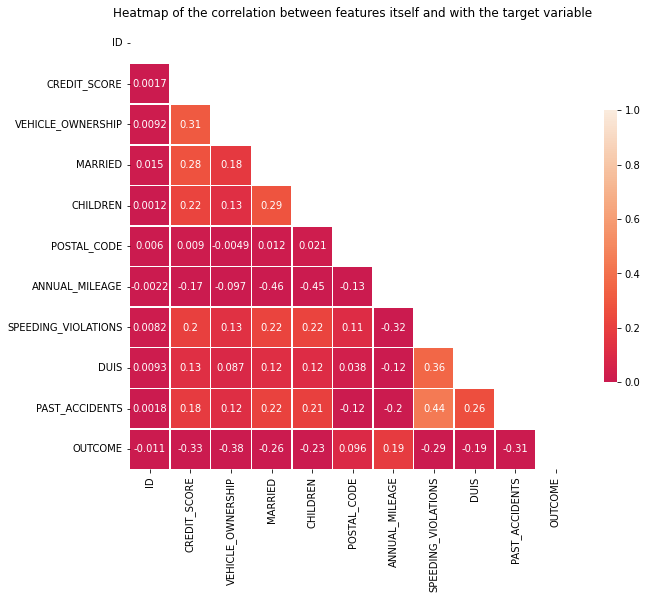

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.select_dtypes(exclude=['object']).corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, mask= np.triu(np.ones_like(corr, dtype=bool)), cmap = sns.color_palette("rocket", as_cmap=True), vmin=0, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
ax.set_title('Heatmap of the correlation between features itself and with the target variable')

##**Boxplot of Annual Mileage and Credit Score**

In [ ]:
df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [ ]:
fig = px.box(df, y='CREDIT_SCORE', color='OUTCOME', title='Box plot of Credit Score')
fig.update_traces(quartilemethod="exclusive")
fig.update_layout(autosize=False, width=1000, height=500)
fig.show()

In [ ]:
fig = px.box(df, y='CREDIT_SCORE', title='Box plot of Credit Score')
fig.update_traces(quartilemethod="exclusive")
fig.update_layout(autosize=False, width=1000, height=500)
fig.show() # slightly negatively skewed + consists outliers

In [ ]:
df.CREDIT_SCORE.skew(skipna = True)

-0.22558698710299238

In [ ]:
am_df = pd.DataFrame(list(df.ANNUAL_MILEAGE.value_counts().index), columns=['Mileage_Value'])
am_df['Count'] = list(df.ANNUAL_MILEAGE.value_counts().values)
fig = px.box(am_df, y='Count', title='Box plot of Annual Mileage')
fig.update_traces(quartilemethod="exclusive")
fig.update_layout(autosize=False, width=1000, height=500)
fig.show() #positively skewed without outliers

In [ ]:
df.ANNUAL_MILEAGE.skew(skipna = True)

0.0401919145690328

#**PART B. DATA CLEANING**

  a. Handling Missing Values - Imputation <br>
  b. Handling Noise - Binning for data smoothing and Remove outliers<br>
  c. Handling inconsistent data - Error made in entry/ illogical entry, Duplicates<br>

##**Prerequisite of data cleaning: Data Transformation**

In [ ]:
print('total number of rows with missing values:', df.isna().any(axis=1).sum()) #total number of rows with missing values: 1851
print('Index of rows with missing values:', df[df.isna().any(axis=1)].index)

total number of rows with missing values: 1851
Index of rows with missing values: Int64Index([  13,   15,   16,   17,   18,   23,   37,   38,   47,   55,
            ...
            9952, 9957, 9959, 9967, 9969, 9977, 9981, 9985, 9988, 9996],
           dtype='int64', length=1851)


In [ ]:
df[df.isna().any(axis=1)].head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
13,569640,16-25,female,majority,0-9y,university,upper class,0.591260,1.0,before 2015,0.0,1.0,10238,NaN,sedan,0,0,0,0.0
15,906223,26-39,female,majority,0-9y,high school,upper class,0.762798,0.0,after 2015,1.0,0.0,10238,NaN,sedan,0,0,0,0.0
16,517747,65+,male,majority,30y+,university,upper class,0.796175,1.0,before 2015,1.0,1.0,32765,NaN,sedan,10,2,1,0.0
17,24851,16-25,male,majority,0-9y,none,poverty,NaN,0.0,before 2015,1.0,0.0,32765,12000.0,sedan,0,0,0,1.0
18,104086,26-39,female,majority,0-9y,university,upper class,0.680594,1.0,before 2015,0.0,1.0,32765,NaN,sedan,0,0,0,1.0


In [ ]:
df[df.isna().any(axis=1)].index

Int64Index([  13,   15,   16,   17,   18,   23,   37,   38,   47,   55,
            ...
            9952, 9957, 9959, 9967, 9969, 9977, 9981, 9985, 9988, 9996],
           dtype='int64', length=1851)

In [ ]:
# Executed to implement imputation
from sklearn.preprocessing import OrdinalEncoder

df_categorical_to_numerical = df.select_dtypes(include=['object']).copy()
df_categorical_to_numerical['POSTAL_CODE'] = df['POSTAL_CODE']
encoder = OrdinalEncoder().fit(df_categorical_to_numerical.to_numpy())
encoded_categorical = encoder.transform(df_categorical_to_numerical.to_numpy())
print("Encoded Categories:", encoder.categories_)

colnames = list(df.select_dtypes(include=['object']).columns)
colnames.append('POSTAL_CODE')

transformed_df = pd.DataFrame(OrdinalEncoder().fit_transform(df_categorical_to_numerical.to_numpy()),
             columns=colnames)
transformed_df.head()

Encoded Categories: [array(['16-25', '26-39', '40-64', '65+'], dtype=object), array(['female', 'male'], dtype=object), array(['majority', 'minority'], dtype=object), array(['0-9y', '10-19y', '20-29y', '30y+'], dtype=object), array(['high school', 'none', 'university'], dtype=object), array(['middle class', 'poverty', 'upper class', 'working class'],
      dtype=object), array(['after 2015', 'before 2015'], dtype=object), array(['sedan', 'sports car'], dtype=object), array([10238, 21217, 32765, 92101], dtype=object)]


,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_YEAR,VEHICLE_TYPE,POSTAL_CODE
0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,2.0,3.0,1.0,0.0,2.0
4,1.0,1.0,0.0,1.0,1.0,3.0,1.0,0.0,2.0


In [ ]:
df_temp = df.select_dtypes(exclude=['object']).copy()
df_temp.drop(['POSTAL_CODE'], axis=1, inplace=True)
combined_df = transformed_df.merge(df_temp, left_index=True, right_index=True)
combined_df.head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_YEAR,VEHICLE_TYPE,POSTAL_CODE,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,569520,0.629027,1.0,0.0,1.0,12000.0,0,0,0,0.0
1,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,750365,0.357757,0.0,0.0,0.0,16000.0,0,0,0,1.0
2,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,199901,0.493146,1.0,0.0,0.0,11000.0,0,0,0,0.0
3,0.0,1.0,0.0,0.0,2.0,3.0,1.0,0.0,2.0,478866,0.206013,1.0,0.0,1.0,11000.0,0,0,0,0.0
4,1.0,1.0,0.0,1.0,1.0,3.0,1.0,0.0,2.0,731664,0.388366,1.0,0.0,0.0,12000.0,2,0,1,1.0


In [ ]:
# Drop column ID because it is insignificant in imputing missing values
combined_df.drop(columns=['ID'], inplace=True)

##**Handling Missing Values**
Approach used:<br> 
a. Univariate feature imputation - Predicted Value Imputation (Simple Imputer) <br>
b. Multivariate Feature Imputation - Statistical Imputation (Iterative Imputer: ExtraTreesRegressor, KNeighborsRegressor, DecisionTree) <br>

---
The total number of rows with missing value is 1851. The total number of missing values for credit score and annual mileage are 982 and 957 respectively (total 1939). This indicates that there are 88 rows that has 2 missing values.

###**Data Before Data Imputation**

In [ ]:
df[df.isna().any(axis=1)].head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
13,569640,16-25,female,majority,0-9y,university,upper class,0.591260,1.0,before 2015,0.0,1.0,10238,NaN,sedan,0,0,0,0.0
15,906223,26-39,female,majority,0-9y,high school,upper class,0.762798,0.0,after 2015,1.0,0.0,10238,NaN,sedan,0,0,0,0.0
16,517747,65+,male,majority,30y+,university,upper class,0.796175,1.0,before 2015,1.0,1.0,32765,NaN,sedan,10,2,1,0.0
17,24851,16-25,male,majority,0-9y,none,poverty,NaN,0.0,before 2015,1.0,0.0,32765,12000.0,sedan,0,0,0,1.0
18,104086,26-39,female,majority,0-9y,university,upper class,0.680594,1.0,before 2015,0.0,1.0,32765,NaN,sedan,0,0,0,1.0


###**Univariate Approach**

In [ ]:
# Approach 1: Simple Imputer (Predicted Value Imputation)
# The estimator for simple imputer is by default BayesianRidge()
# 
# To summarize, generally if the distribution of data is skewed to the left, 
# the mean is less than the median, which is often less than the mode. 
# If the distribution of data is skewed to the right, 
# the mode is often less than the median, which is less than the mean.

from sklearn.impute import SimpleImputer
import numpy as np

# Overcome: Credit score and Annual Mileage with median (-ve skewed, outliers -> impute with missing values with median)
def simple_imputing(strategy, ):
  simple_imputing = SimpleImputer(missing_values=np.nan, strategy=strategy)
  simple_imputed_df = pd.DataFrame(simple_imputing.fit_transform(combined_df), columns=combined_df.columns)
  return simple_imputed_df.iloc[df[df.isna().any(axis=1)].index.values.tolist()][['CREDIT_SCORE', 'ANNUAL_MILEAGE']].head()

In [ ]:
simple_imputing('median')

,CREDIT_SCORE,ANNUAL_MILEAGE
13,0.591260,12000.0
15,0.762798,12000.0
16,0.796175,12000.0
17,0.525033,12000.0
18,0.680594,12000.0


In [ ]:
simple_imputing('most_frequent')

,CREDIT_SCORE,ANNUAL_MILEAGE
13,0.591260,11000.0
15,0.762798,11000.0
16,0.796175,11000.0
17,0.053358,12000.0
18,0.680594,11000.0


###**👍Multivariate Approach**

In [ ]:
# Enable iterative experimental feature
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Different potential estimators
# By default: BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import BayesianRidge

# # create pipelines
from sklearn.pipeline import make_pipeline

# # validate which estimator and strategy result in lower loss
from sklearn.model_selection import cross_val_score

In [ ]:
estimators_selection = [BayesianRidge(), DecisionTreeRegressor(max_features="sqrt", random_state=42),
              ExtraTreesRegressor(n_estimators=10, random_state=42), KNeighborsRegressor(n_neighbors=10)]

def different_estimators(strategy, estimator_type, df):
  imperator = IterativeImputer(random_state=42, imputation_order='random', initial_strategy=strategy, max_iter=15,
                               estimator=estimator_type)
  imputed_df = pd.DataFrame(imperator.fit_transform(df), columns=df.columns)
  return imputed_df.iloc[df[df.isna().any(axis=1)].index.values.tolist()][['CREDIT_SCORE', 'ANNUAL_MILEAGE']].head()

In [ ]:
for estimate in estimators_selection:
  print('\n', estimate, '\n')
  print(different_estimators(strategy='median', estimator_type=estimate, df=combined_df).head())


 BayesianRidge() 

    CREDIT_SCORE  ANNUAL_MILEAGE
13      0.591260    12112.640726
15      0.762798    12125.146787
16      0.796175     8305.256921
17      0.391853    12000.000000
18      0.680594    11211.605770

 DecisionTreeRegressor(max_features='sqrt', random_state=42) 

    CREDIT_SCORE  ANNUAL_MILEAGE
13      0.591260         12000.0
15      0.762798         14000.0
16      0.796175          7000.0
17      0.364821         12000.0
18      0.680594         11000.0

 ExtraTreesRegressor(n_estimators=10, random_state=42) 

    CREDIT_SCORE  ANNUAL_MILEAGE
13      0.591260         11000.0
15      0.762798         13700.0
16      0.796175          7600.0
17      0.341963         12000.0
18      0.680594         10900.0

 KNeighborsRegressor(n_neighbors=10) 

    CREDIT_SCORE  ANNUAL_MILEAGE
13      0.591260         11600.0
15      0.762798         13000.0
16      0.796175          8500.0
17      0.427888         12000.0
18      0.680594         11200.0


In [ ]:
for estimate in estimators_selection:
  print('\n', estimate, '\n')
  print(different_estimators(strategy='most_frequent', estimator_type=estimate, df=combined_df).head())


 BayesianRidge() 

    CREDIT_SCORE  ANNUAL_MILEAGE
13      0.591260    12112.789261
15      0.762798    12125.486205
16      0.796175     8305.488184
17      0.391853    12000.000000
18      0.680594    11211.813914

 DecisionTreeRegressor(max_features='sqrt', random_state=42) 

    CREDIT_SCORE  ANNUAL_MILEAGE
13      0.591260         11000.0
15      0.762798         11000.0
16      0.796175          9000.0
17      0.364821         12000.0
18      0.680594         11000.0

 ExtraTreesRegressor(n_estimators=10, random_state=42) 

    CREDIT_SCORE  ANNUAL_MILEAGE
13      0.591260         10500.0
15      0.762798         12300.0
16      0.796175          8400.0
17      0.355581         12000.0
18      0.680594         11000.0

 KNeighborsRegressor(n_neighbors=10) 

    CREDIT_SCORE  ANNUAL_MILEAGE
13      0.591260         11600.0
15      0.762798         13000.0
16      0.796175          8500.0
17      0.440033         12000.0
18      0.680594         11200.0


###**!! Find the best approach for data imputation**

In [ ]:
cross_val_results = pd.DataFrame()
for strategy in ("mean", "median", "most_frequent"):
    br_estimator = make_pipeline(SimpleImputer(strategy=strategy, missing_values=np.nan), BayesianRidge())

    cross_val_results[strategy + BayesianRidge().__class__.__name__] = cross_val_score(br_estimator, 
                                                                                       combined_df.iloc[:,:-1], combined_df.iloc[:,-1],
                                                                                       scoring="neg_mean_squared_error", 
                                                                                       cv=20)

In [ ]:
estimators_selection = [BayesianRidge()]#, KNeighborsRegressor(), DecisionTreeRegressor(),ExtraTreesRegressor()] # KNeighborsRegressor(),, 

cross_val_results_part2 = pd.DataFrame()
for estimate in estimators_selection:
  iterator_imp = make_pipeline(IterativeImputer(random_state=42, estimator=estimate, initial_strategy='median', max_iter=50), BayesianRidge())
  cross_val_results_part2[estimate.__class__.__name__ + 'median'] = cross_val_score(iterator_imp, combined_df.iloc[:,:-1], combined_df.iloc[:,-1],
                                                                              scoring="neg_mean_squared_error", cv=20)#sample_posterior=True
  
  iterator_imp = make_pipeline(IterativeImputer(random_state=42, estimator=estimate, initial_strategy='mean', max_iter=50), BayesianRidge())
  cross_val_results_part2[estimate.__class__.__name__ + 'mean'] = cross_val_score(iterator_imp, combined_df.iloc[:,:-1], combined_df.iloc[:,-1],
                                                                              scoring="neg_mean_squared_error", cv=20)

  iterator_imp = make_pipeline(IterativeImputer(random_state=42, estimator=estimate, initial_strategy='most_frequent', max_iter=50), BayesianRidge())
  cross_val_results_part2[estimate.__class__.__name__ + 'most_frequent'] = cross_val_score(iterator_imp, combined_df.iloc[:,:-1], combined_df.iloc[:,-1],
                                                                              scoring="neg_mean_squared_error", cv=20)                                                                     

In [ ]:
scores = pd.concat(
    [cross_val_results, cross_val_results_part2],
    keys=["SimpleImputer", "IterativeImputer"],
    axis=1,
)

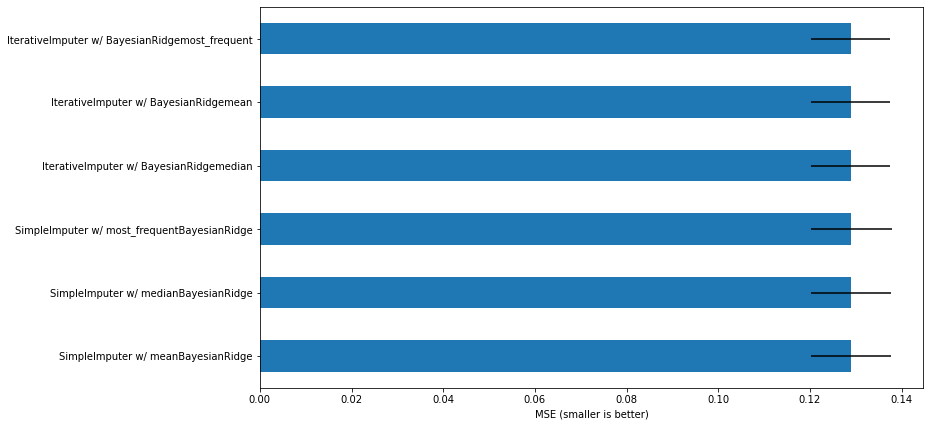

In [ ]:
fig, ax = plt.subplots(figsize=(13, 6))
means = -scores.mean()
errors = scores.std()
means.plot.barh(xerr=errors, ax=ax)
# ax.set_title("California Housing Regression with Different Imputation Methods")
ax.set_xlabel("MSE (smaller is better)")
ax.set_yticks(np.arange(means.shape[0]))
ax.set_yticklabels([" w/ ".join(label) for label in means.index.tolist()])
plt.tight_layout(pad=1)
plt.show()

In [ ]:
-scores.mean()

SimpleImputer     meanBayesianRidge             0.128961
                  medianBayesianRidge           0.128957
                  most_frequentBayesianRidge    0.129062
IterativeImputer  BayesianRidgemedian           0.128872
                  BayesianRidgemean             0.128872
                  BayesianRidgemost_frequent    0.128872
dtype: float64

Hence, the ideal data imputation method is by using Iterative Imputer on any of the central measure of tendency (median will be applied)

##**Handling Noise - Remove outliers** 

Remove Outliers
---
Although outliers will produce a better generalized model, it disregard and fail to acknowledge and considerate the occurence of rare/special events such as speeding violations and past accidents that a policyholder may experienced. Hence, to develop a machine learning model that is tailor to deal with real life situation, the presence of insignificant number of outliers are not removed.

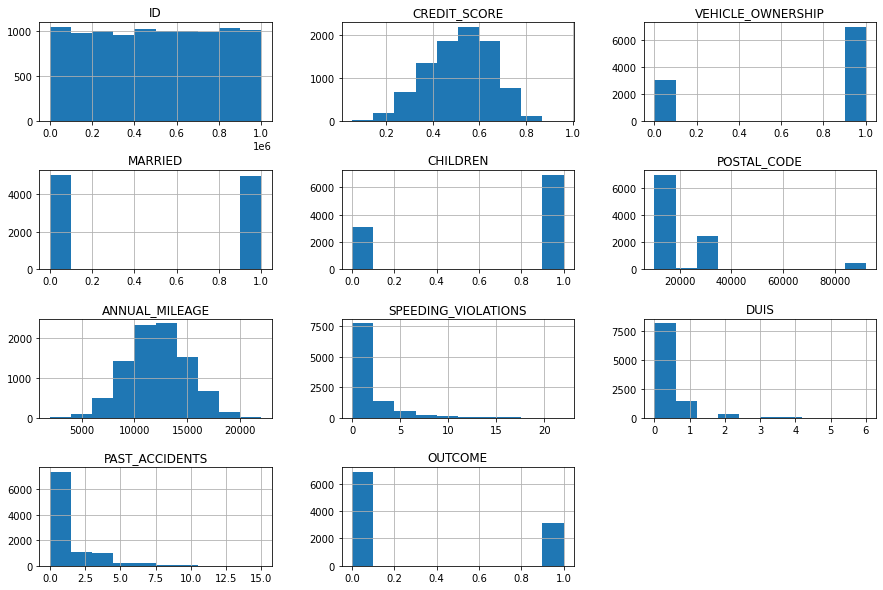

In [ ]:
df.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5) 

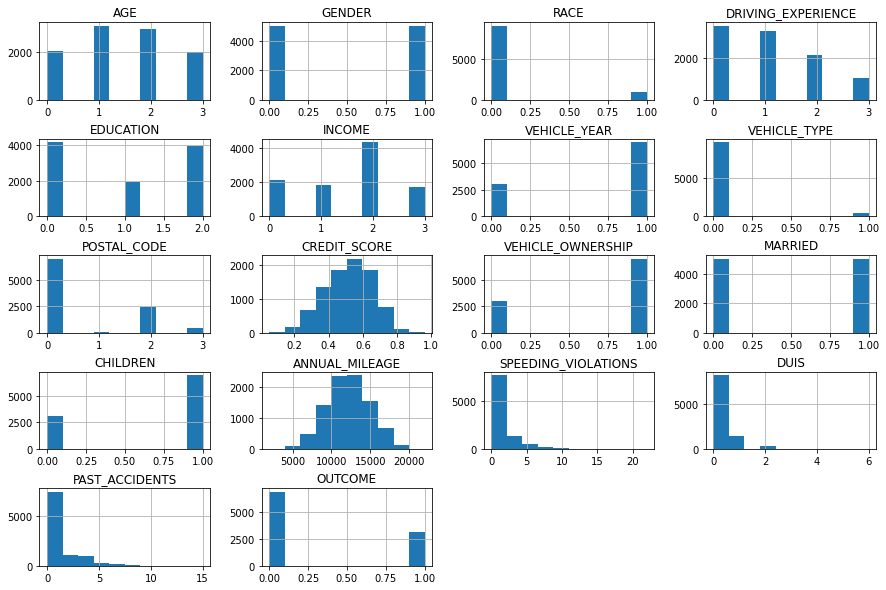

In [ ]:
combined_df.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5) 

##**Handling inconsistent data**

In [ ]:
combined_df[combined_df.duplicated() == True] 
# total 18 rows are detected as duplicates but none of them will be deleted as the total number of unique IDs are 10K.
# This indicates that each records represents a completely different car insurance policyholder

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_YEAR,VEHICLE_TYPE,POSTAL_CODE,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
2370,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,0.0,0.0,0.0,14000.0,0,0,0,0.0
3200,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,NaN,0.0,0.0,1.0,NaN,0,0,0,1.0
4457,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,NaN,0.0,0.0,0.0,13000.0,0,0,0,1.0
5605,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0,0,0,1.0
6151,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,NaN,1.0,0.0,1.0,9000.0,0,0,0,0.0
6766,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,0.0,0.0,0.0,15000.0,0,0,0,1.0
7259,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,0.0,0.0,0.0,14000.0,0,0,0,1.0
7400,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,NaN,0.0,0.0,0.0,14000.0,0,0,0,1.0
7702,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,NaN,0.0,0.0,0.0,17000.0,0,0,0,1.0
7802,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,0.0,0.0,0.0,15000.0,0,0,0,1.0


In [ ]:
df.ID.unique().size

10000

##**Final Set of Cleaned Data**
Note: Policyholder's remained remove from the dataset as it doesn't play a significant role in car insurance classification.

In [ ]:
imperator = IterativeImputer(random_state=42, imputation_order='random', initial_strategy=strategy, max_iter=15, estimator=BayesianRidge())
imputed_df = pd.DataFrame(imperator.fit_transform(combined_df), columns=combined_df.columns)
imputed_df.head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_YEAR,VEHICLE_TYPE,POSTAL_CODE,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.629027,1.0,0.0,1.0,12000.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.357757,0.0,0.0,0.0,16000.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.493146,1.0,0.0,0.0,11000.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,2.0,3.0,1.0,0.0,2.0,0.206013,1.0,0.0,1.0,11000.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,1.0,1.0,3.0,1.0,0.0,2.0,0.388366,1.0,0.0,0.0,12000.0,2.0,0.0,1.0,1.0


In [ ]:
imputed_df.shape

(10000, 18)

In [ ]:
imputed_df.isna().any()

AGE                    False
GENDER                 False
RACE                   False
DRIVING_EXPERIENCE     False
EDUCATION              False
INCOME                 False
VEHICLE_YEAR           False
VEHICLE_TYPE           False
POSTAL_CODE            False
CREDIT_SCORE           False
VEHICLE_OWNERSHIP      False
MARRIED                False
CHILDREN               False
ANNUAL_MILEAGE         False
SPEEDING_VIOLATIONS    False
DUIS                   False
PAST_ACCIDENTS         False
OUTCOME                False
dtype: bool

#**PART C. DATA REDUCTION**<br>

note: **A-C similar** <br>

a. Data compression (to obtain a compressed / reduced representation of original data) - Wavelet Transform and PCA<br>
b. Dimensionality Reduction - Forward Selection/ Stepwise backward elimination / both - SAME AS DATA COMPRESSION<br>
c. Numerosity Reduction (replace the original data volume by alternative, smaller forms of data representation)- Regression and Log-Linear Models, Histograms, Clustering, Sampling, data cube aggregation - SAME WITH DATA SMOOTHING / DISCRETIZATION<br>
d. Perform Data Transformation - Smoothing, Aggregation, Normalization, Generalization, Attribute/Feature Construction, Discretization (for some attributes)<br>

##**Data Transformation: Scaling**

In [ ]:
for colname in imputed_df.columns:
  print('\n',colname)
  print(imputed_df[colname].unique())


 AGE
[3. 0. 1. 2.]

 GENDER
[0. 1.]

 RACE
[0. 1.]

 DRIVING_EXPERIENCE
[0. 1. 2. 3.]

 EDUCATION
[0. 1. 2.]

 INCOME
[2. 1. 3. 0.]

 VEHICLE_YEAR
[0. 1.]

 VEHICLE_TYPE
[0. 1.]

 POSTAL_CODE
[0. 2. 3. 1.]

 CREDIT_SCORE
[0.62902731 0.35775712 0.49314579 ... 0.47094023 0.36418478 0.43522478]

 VEHICLE_OWNERSHIP
[1. 0.]

 MARRIED
[0. 1.]

 CHILDREN
[1. 0.]

 ANNUAL_MILEAGE
[12000.         16000.         11000.         13000.
 14000.         10000.          8000.         12112.78926141
 12125.4862046   8305.48818396 11211.8139143  18000.
 17000.          7000.         15000.          9000.
 11688.72353451 11063.46121213 13872.80486786  5000.
  9016.97655946 11394.15541936 13986.72372735 11177.64301836
 10483.83176352 10731.54881322 11847.32825087 13007.33341123
  6000.         14697.91896425 12846.79591332 14896.12835676
 12781.87944279 12489.10804993 10290.01433777  9424.37610319
 11096.41589763 12772.03293586 14427.97667974 12004.98851675
 11090.43909102 12499.86176778 12801.65674791 

In [ ]:
# Scale features/attributes by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler

stdscaler = StandardScaler().fit_transform(imputed_df[['CREDIT_SCORE', 'ANNUAL_MILEAGE']])
scaled_continuous = pd.DataFrame(stdscaler, columns=['CREDIT_SCORE', 'ANNUAL_MILEAGE'])
scaled_continuous.head()

,CREDIT_SCORE,ANNUAL_MILEAGE
0,0.853541,0.112080
1,-1.183693,1.573650
2,-0.166927,-0.253313
3,-2.323290,-0.253313
4,-0.953822,0.112080


In [ ]:
scaled_imputed_df = imputed_df.drop(['CREDIT_SCORE', 'ANNUAL_MILEAGE'], axis=1)
scaled_imputed_df = scaled_imputed_df.merge(scaled_continuous, left_index=True, right_index=True)
scaled_imputed_df.head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_YEAR,VEHICLE_TYPE,POSTAL_CODE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,CREDIT_SCORE,ANNUAL_MILEAGE
0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.853541,0.112080
1,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.183693,1.573650
2,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.166927,-0.253313
3,0.0,1.0,0.0,0.0,2.0,3.0,1.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,-2.323290,-0.253313
4,1.0,1.0,0.0,1.0,1.0,3.0,1.0,0.0,2.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,-0.953822,0.112080


In [ ]:
for colname in imputed_df.columns:
  print('\n',colname)
  print(scaled_imputed_df[colname].unique())


 AGE
[3. 0. 1. 2.]

 GENDER
[0. 1.]

 RACE
[0. 1.]

 DRIVING_EXPERIENCE
[0. 1. 2. 3.]

 EDUCATION
[0. 1. 2.]

 INCOME
[2. 1. 3. 0.]

 VEHICLE_YEAR
[0. 1.]

 VEHICLE_TYPE
[0. 1.]

 POSTAL_CODE
[0. 2. 3. 1.]

 CREDIT_SCORE
[ 0.85354095 -1.18369309 -0.16692676 ... -0.33369005 -1.13542143
 -0.60191242]

 VEHICLE_OWNERSHIP
[1. 0.]

 MARRIED
[0. 1.]

 CHILDREN
[1. 0.]

 ANNUAL_MILEAGE
[ 1.12079756e-01  1.57364959e+00 -2.53312703e-01  4.77472215e-01
  8.42864675e-01 -6.18705163e-01 -1.34949008e+00  1.53292102e-01
  1.57931469e-01 -1.23786700e+00 -1.75917496e-01  2.30443451e+00
  1.93904205e+00 -1.71488254e+00  1.20825713e+00 -9.84097622e-01
 -1.65831734e-03 -2.30124455e-01  7.96388533e-01 -2.44566746e+00
 -9.77894516e-01 -1.09291285e-01  8.38013625e-01 -1.88403284e-01
 -4.41916685e-01 -3.51402743e-01  5.62946500e-02  4.80151789e-01
 -2.08027500e+00  1.09787900e+00  4.21492597e-01  1.17030322e+00
  3.97772609e-01  2.90796149e-01 -5.12736111e-01 -8.29033794e-01
 -2.18083062e-01  3.94174769e-01

##**Data Transformation: Discretization**

In [ ]:
# DISCRETIZATION: Speeding violation, Past accidents, Credit Score, Annual Mileage

from sklearn.preprocessing import KBinsDiscretizer

def discritizer_fx(col_name, df, n_bins):
  binning_np = df[col_name].to_numpy()
  kbinsdiscretized_feature = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='kmeans').fit_transform(binning_np.reshape(-1,1))
  df.drop(columns = [col_name], inplace=True)
  df = df.merge(pd.DataFrame(kbinsdiscretized_feature, columns=[col_name]), left_index=True, right_index=True)
  return df

In [ ]:
scaled_imputed_discrete_df = discritizer_fx('CREDIT_SCORE', scaled_imputed_df, 5)
scaled_imputed_discrete_df = discritizer_fx('ANNUAL_MILEAGE', scaled_imputed_discrete_df, 5)
scaled_imputed_discrete_df = discritizer_fx('SPEEDING_VIOLATIONS', scaled_imputed_discrete_df, 7)
scaled_imputed_discrete_df = discritizer_fx('DUIS', scaled_imputed_discrete_df, 3)
scaled_imputed_discrete_df = discritizer_fx('PAST_ACCIDENTS', scaled_imputed_discrete_df, 5)
scaled_imputed_discrete_df.head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_YEAR,VEHICLE_TYPE,POSTAL_CODE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,OUTCOME,CREDIT_SCORE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,2.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,2.0,3.0,1.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0
4,1.0,1.0,0.0,1.0,1.0,3.0,1.0,0.0,2.0,1.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0


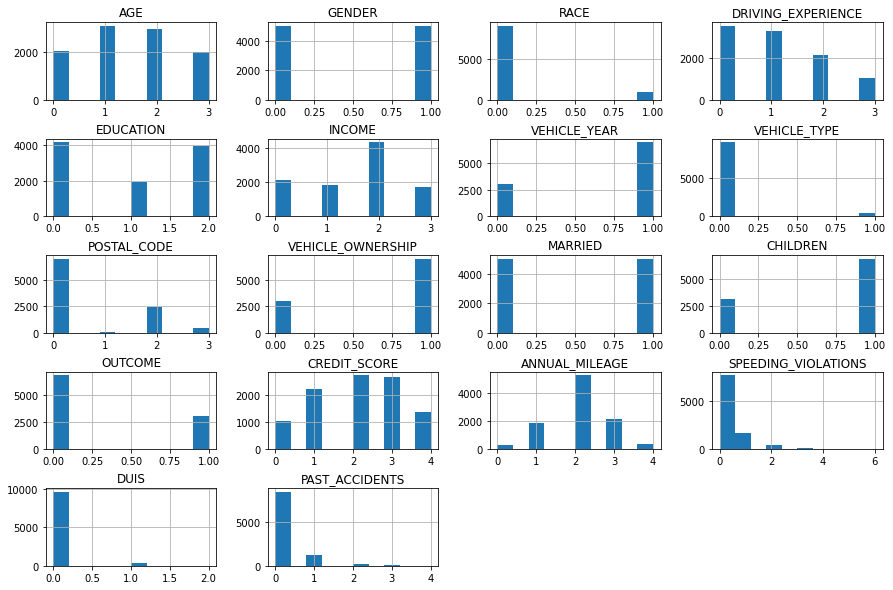

In [ ]:
scaled_imputed_discrete_df.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5) 

##**Feature Selection**

###**SelectKBest (Univariate feature selection)**

In [ ]:
# Prepare X and Y
X = scaled_imputed_discrete_df.drop(['OUTCOME'], axis=1)
Y = scaled_imputed_discrete_df['OUTCOME']

X.shape, Y.shape

((10000, 17), (10000,))

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

kBest_X = SelectKBest(chi2)
kBest_X.fit_transform(X, Y)

array([[3., 0., 0., ..., 3., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 2., 0., 0.],
       ...,
       [1., 0., 1., ..., 2., 0., 0.],
       [1., 1., 1., ..., 1., 0., 0.],
       [1., 0., 1., ..., 1., 0., 0.]])

In [ ]:
kBest_X.get_support(indices=True)

array([ 0,  3,  6,  8,  9, 10, 11, 12, 14, 16])

In [ ]:
0 in list(kBest_X.get_support(indices=True))

True

In [ ]:
kbest_attribute_df = pd.DataFrame()
for index_num, col_name in enumerate(list(X.columns)):
  if index_num in list(kBest_X.get_support(indices=True)):
    kbest_attribute_df[col_name] = X[col_name]

In [ ]:
kbest_attribute_df.head()

,AGE,DRIVING_EXPERIENCE,VEHICLE_YEAR,POSTAL_CODE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,CREDIT_SCORE,SPEEDING_VIOLATIONS,PAST_ACCIDENTS
0,3.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0
3,0.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,1.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0


###**SelectFromModel**

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

selector = SelectFromModel(estimator=LogisticRegression()).fit(X, Y)
selector.estimator_.coef_

array([[-0.0161261 ,  0.93665554, -0.16055871, -1.74214392,  0.00755288,
         0.01120597,  1.73102159, -0.00572543,  0.55067702, -1.69731561,
        -0.35103865, -0.09249203, -0.04724163,  0.33690757, -0.02480972,
         0.02699911, -0.30649322]])

In [ ]:
selector.threshold_

0.4732332166939286

In [ ]:
chosen_feature = [index_val for index_val, bool_val in enumerate(selector.get_support()) if bool_val == True ]
chosen_feature

[1, 3, 6, 8, 9]

In [ ]:
selector.transform(X)

array([[0., 0., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [0., 0., 1., 0., 1.],
       ...,
       [1., 0., 1., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 0., 1., 0., 1.]])

In [ ]:
selectfrommodel_attribute_df = pd.DataFrame()
for index_num, col_name in enumerate(list(X.columns)):
  if index_num in chosen_feature:
    selectfrommodel_attribute_df[col_name] = X[col_name]

In [ ]:
selectfrommodel_attribute_df.head()

,GENDER,DRIVING_EXPERIENCE,VEHICLE_YEAR,POSTAL_CODE,VEHICLE_OWNERSHIP
0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,1.0
3,1.0,0.0,1.0,2.0,1.0
4,1.0,1.0,1.0,2.0,1.0


###**👍Recursive Feature Elimination with Cross Validation**

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR

estimator = SVR(kernel="linear")
selector = RFECV(estimator, step=1, cv=15)
selector = selector.fit(X, Y)
selector.support_

array([ True,  True,  True,  True, False,  True,  True, False,  True,
        True,  True,  True,  True,  True, False, False,  True])

In [ ]:
selector.ranking_

array([1, 1, 1, 1, 5, 1, 1, 4, 1, 1, 1, 1, 1, 1, 2, 3, 1])

In [ ]:
rfscv_top = [index for index, top_rank in enumerate(list(selector.ranking_)) if top_rank == 1]
rfscv_top

[0, 1, 2, 3, 5, 6, 8, 9, 10, 11, 12, 13, 16]

In [ ]:
rfscv_attribute_df = pd.DataFrame()
for index_num, col_name in enumerate(list(X.columns)):
  if index_num in rfscv_top:
    rfscv_attribute_df[col_name] = X[col_name]

In [ ]:
rfscv_attribute_df.head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,INCOME,VEHICLE_YEAR,POSTAL_CODE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,CREDIT_SCORE,ANNUAL_MILEAGE,PAST_ACCIDENTS
0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,3.0,2.0,0.0
1,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0
2,0.0,0.0,0.0,0.0,3.0,1.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0
3,0.0,1.0,0.0,0.0,3.0,1.0,2.0,1.0,0.0,1.0,0.0,2.0,0.0
4,1.0,1.0,0.0,1.0,3.0,1.0,2.0,1.0,0.0,0.0,1.0,2.0,0.0


###**Sequential Feature Selector**

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
sfs = SequentialFeatureSelector(knn, n_features_to_select=10)
sfs.fit(X, Y)

SequentialFeatureSelector(estimator=KNeighborsClassifier(n_neighbors=3),
                          n_features_to_select=10)

In [ ]:
sfs.get_support()

array([False,  True, False,  True, False, False,  True,  True,  True,
        True,  True, False, False,  True, False,  True,  True])

In [ ]:
sfs.transform(X).shape

(10000, 10)

In [ ]:
sfs_chosen_feature = [index_val for index_val, bool_val in enumerate(sfs.get_support()) if bool_val == True ]
sfs_chosen_feature

[1, 3, 6, 7, 8, 9, 10, 13, 15, 16]

In [ ]:
sfs_attribute_df = pd.DataFrame()
for index_num, col_name in enumerate(list(X.columns)):
  if index_num in sfs_chosen_feature:
    sfs_attribute_df[col_name] = X[col_name]

In [ ]:
sfs_attribute_df.head()

,GENDER,DRIVING_EXPERIENCE,VEHICLE_YEAR,VEHICLE_TYPE,POSTAL_CODE,VEHICLE_OWNERSHIP,MARRIED,ANNUAL_MILEAGE,DUIS,PAST_ACCIDENTS
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0
3,1.0,0.0,1.0,0.0,2.0,1.0,0.0,2.0,0.0,0.0
4,1.0,1.0,1.0,0.0,2.0,1.0,0.0,2.0,0.0,0.0


Text(0.5, 1.0, 'Heatmap of the correlation between features itself and with the target variable')

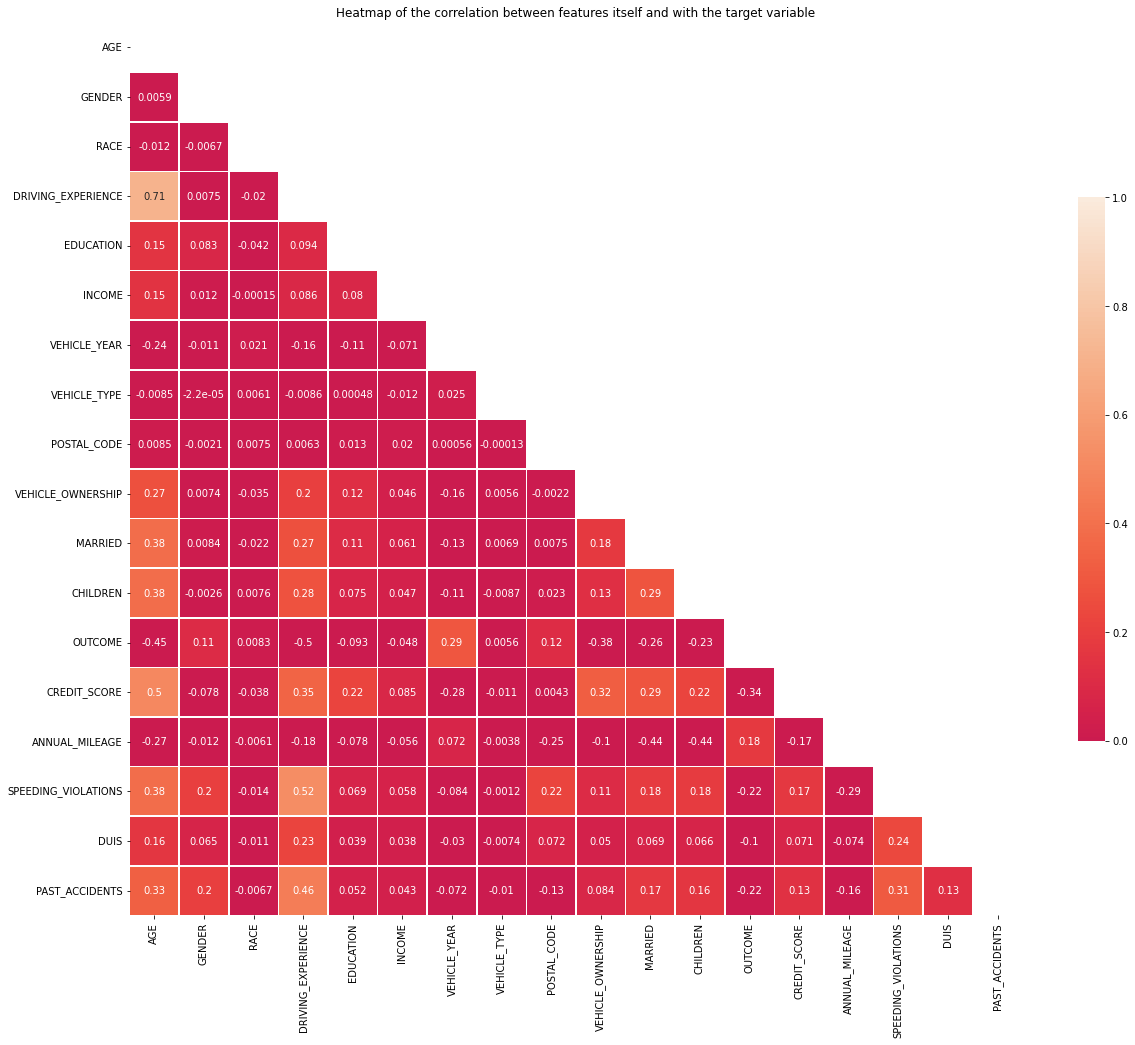

In [ ]:
corr = scaled_imputed_discrete_df.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask= np.triu(np.ones_like(corr, dtype=bool)), cmap = sns.color_palette("rocket", as_cmap=True), vmin=0, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
ax.set_title('Heatmap of the correlation between features itself and with the target variable')

##**Dimensionality Reduction**

In [ ]:
# post feature selection
final_df = rfscv_attribute_df.copy()
final_df.head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,INCOME,VEHICLE_YEAR,POSTAL_CODE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,CREDIT_SCORE,ANNUAL_MILEAGE,PAST_ACCIDENTS
0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,3.0,2.0,0.0
1,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0
2,0.0,0.0,0.0,0.0,3.0,1.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0
3,0.0,1.0,0.0,0.0,3.0,1.0,2.0,1.0,0.0,1.0,0.0,2.0,0.0
4,1.0,1.0,0.0,1.0,3.0,1.0,2.0,1.0,0.0,0.0,1.0,2.0,0.0


In [ ]:
final_df.shape

(10000, 13)

In [ ]:
final_df.isna().any()

AGE                   False
GENDER                False
RACE                  False
DRIVING_EXPERIENCE    False
INCOME                False
VEHICLE_YEAR          False
POSTAL_CODE           False
VEHICLE_OWNERSHIP     False
MARRIED               False
CHILDREN              False
CREDIT_SCORE          False
ANNUAL_MILEAGE        False
PAST_ACCIDENTS        False
dtype: bool

###**👉PCA**

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(final_df)

PCA()

In [ ]:
pca.explained_variance_ratio_

array([0.33896378, 0.1452937 , 0.12985379, 0.11644783, 0.07830481,
       0.03764039, 0.03440641, 0.0256371 , 0.02334957, 0.02173446,
       0.01869595, 0.01805553, 0.01161669])

In [ ]:
pca.singular_values_

array([160.798946  , 105.27613816,  99.52538473,  94.24802448,
        77.28598727,  53.58380912,  51.23021833,  44.22226318,
        42.20326225,  40.7174911 ,  37.7642016 ,  37.11177077,
        29.76787424])

In [ ]:
pca.transform(final_df)

array([[ 0.95334277, -0.6220325 , -0.35441351, ...,  0.53279818,
         0.07864171, -0.13645562],
       [-2.53709487, -0.80203083,  0.14677718, ...,  0.02234025,
        -0.27391698, -0.10832031],
       [-1.38594013, -0.2905008 , -1.48230284, ...,  0.52769078,
        -0.29103257, -0.08976981],
       ...,
       [-1.30091067, -1.07249948,  1.32927335, ..., -0.32124614,
         0.23044109, -0.10544831],
       [-1.18756127, -0.44980168,  0.23883981, ..., -0.1737668 ,
         0.01029003, -0.14565098],
       [-1.14975688, -0.08426488, -1.65544559, ..., -0.12809073,
         0.4766723 , -0.10541265]])

In [ ]:
pca.transform(final_df).shape

(10000, 13)

In [ ]:
pd.DataFrame(pca.transform(final_df), columns=final_df.columns).head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,INCOME,VEHICLE_YEAR,POSTAL_CODE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,CREDIT_SCORE,ANNUAL_MILEAGE,PAST_ACCIDENTS
0,0.953343,-0.622033,-0.354414,-0.898978,-0.384870,1.594129,0.184547,0.223370,0.500337,-0.701112,0.532798,0.078642,-0.136456
1,-2.537095,-0.802031,0.146777,-0.147050,0.303880,-0.340219,0.361956,-0.381019,0.240873,0.248644,0.022340,-0.273917,-0.108320
2,-1.385940,-0.290501,-1.482303,-1.232866,-0.422788,-0.479020,-0.578699,0.117883,-0.391011,-0.245258,0.527691,-0.291033,-0.089770
3,-2.382989,1.825815,-1.578011,0.208343,0.042549,-0.239941,0.408163,0.232866,-0.369905,-0.603366,-0.337437,0.258680,-0.116753
4,-0.886031,1.549266,-1.416426,0.222215,0.687438,-0.327309,0.337817,0.076373,-0.445377,-0.195532,0.264539,-0.558849,-0.091635


In [ ]:
# hist

###**Feature Agglomeration**

In [ ]:
from sklearn import cluster

agglo = cluster.FeatureAgglomeration(n_clusters=13)
agglo.fit(final_df)

FeatureAgglomeration(n_clusters=13)

In [ ]:
agglo.transform(final_df)

array([[0., 2., 1., ..., 2., 0., 0.],
       [0., 3., 0., ..., 1., 0., 0.],
       [0., 2., 0., ..., 3., 0., 0.],
       ...,
       [0., 3., 1., ..., 0., 0., 0.],
       [0., 2., 1., ..., 1., 0., 0.],
       [0., 2., 1., ..., 3., 0., 0.]])

In [ ]:
agglo.transform(final_df).shape

(10000, 13)

In [ ]:
pd.DataFrame(agglo.transform(final_df), columns=final_df.columns).head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,INCOME,VEHICLE_YEAR,POSTAL_CODE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,CREDIT_SCORE,ANNUAL_MILEAGE,PAST_ACCIDENTS
0,0.0,2.0,1.0,3.0,1.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0
1,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
2,0.0,2.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0
3,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0,2.0,0.0
4,0.0,2.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,3.0,2.0,0.0


In [ ]:
new_df = pd.DataFrame(pca.transform(final_df), columns=final_df.columns)
new_df.head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,INCOME,VEHICLE_YEAR,POSTAL_CODE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,CREDIT_SCORE,ANNUAL_MILEAGE,PAST_ACCIDENTS
0,0.953343,-0.622033,-0.354414,-0.898978,-0.384870,1.594129,0.184547,0.223370,0.500337,-0.701112,0.532798,0.078642,-0.136456
1,-2.537095,-0.802031,0.146777,-0.147050,0.303880,-0.340219,0.361956,-0.381019,0.240873,0.248644,0.022340,-0.273917,-0.108320
2,-1.385940,-0.290501,-1.482303,-1.232866,-0.422788,-0.479020,-0.578699,0.117883,-0.391011,-0.245258,0.527691,-0.291033,-0.089770
3,-2.382989,1.825815,-1.578011,0.208343,0.042549,-0.239941,0.408163,0.232866,-0.369905,-0.603366,-0.337437,0.258680,-0.116753
4,-0.886031,1.549266,-1.416426,0.222215,0.687438,-0.327309,0.337817,0.076373,-0.445377,-0.195532,0.264539,-0.558849,-0.091635


In [ ]:
new_df['OUTCOME'] = Y
new_df.head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,INCOME,VEHICLE_YEAR,POSTAL_CODE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,CREDIT_SCORE,ANNUAL_MILEAGE,PAST_ACCIDENTS,OUTCOME
0,0.953343,-0.622033,-0.354414,-0.898978,-0.384870,1.594129,0.184547,0.223370,0.500337,-0.701112,0.532798,0.078642,-0.136456,0.0
1,-2.537095,-0.802031,0.146777,-0.147050,0.303880,-0.340219,0.361956,-0.381019,0.240873,0.248644,0.022340,-0.273917,-0.108320,1.0
2,-1.385940,-0.290501,-1.482303,-1.232866,-0.422788,-0.479020,-0.578699,0.117883,-0.391011,-0.245258,0.527691,-0.291033,-0.089770,0.0
3,-2.382989,1.825815,-1.578011,0.208343,0.042549,-0.239941,0.408163,0.232866,-0.369905,-0.603366,-0.337437,0.258680,-0.116753,0.0
4,-0.886031,1.549266,-1.416426,0.222215,0.687438,-0.327309,0.337817,0.076373,-0.445377,-0.195532,0.264539,-0.558849,-0.091635,1.0


In [ ]:
new_df.to_csv('cleaned_car_insurance_dataset.csv')

**END OF PROJECT**